In [1]:
import matplotlib.pyplot as plt

from data import train_X_list, train_y_list, test_X_list, test_y_list
from structures import DecisionTree
from quality import test_classifier

In [2]:
heights = []
for dataset_index in range(21):
    best_h = 0
    best_f_score = 0
    for h in range(1, 21):
        tree = DecisionTree(h)
        tree.fit(train_X_list[dataset_index], train_y_list[dataset_index])
        cur_f_score = test_classifier(tree, test_X_list[dataset_index], test_y_list[dataset_index])
        if best_f_score < cur_f_score:
            best_f_score = cur_f_score
            best_h = h
    heights.append(best_h)
    print('best h for dataset %d is %d, with f_score = %f' % (dataset_index, best_h, best_f_score))

best h for dataset 0 is 3, with f_score = 0.999486
best h for dataset 1 is 9, with f_score = 0.648926
best h for dataset 2 is 1, with f_score = 1.000000
best h for dataset 3 is 5, with f_score = 0.992685
best h for dataset 4 is 1, with f_score = 0.995785
best h for dataset 5 is 3, with f_score = 0.992329
best h for dataset 6 is 3, with f_score = 0.996281
best h for dataset 7 is 2, with f_score = 0.997990
best h for dataset 8 is 5, with f_score = 0.812556
best h for dataset 9 is 4, with f_score = 0.994007
best h for dataset 10 is 1, with f_score = 0.999196
best h for dataset 11 is 7, with f_score = 0.868610
best h for dataset 12 is 7, with f_score = 0.624002
best h for dataset 13 is 6, with f_score = 0.961454
best h for dataset 14 is 1, with f_score = 1.000000
best h for dataset 15 is 1, with f_score = 1.000000
best h for dataset 16 is 7, with f_score = 0.817051
best h for dataset 17 is 5, with f_score = 0.936440
best h for dataset 18 is 7, with f_score = 0.815744
best h for dataset 19 

In [3]:
indices = sorted(range(len(heights)), key=lambda i: heights[i])
min_h_dataset_index = indices[0]
mid_h_dataset_index = indices[len(indices) // 2]
max_h_dataset_index = indices[-1]

In [4]:
def draw_graphic(dataset_index, title):
    heights = range(1, 21)
    train_f_scores, test_f_scores = [], []
    for h in heights:
        tree = DecisionTree(h)
        tree.fit(train_X_list[dataset_index], train_y_list[dataset_index])
        
        train_f_scores.append(test_classifier(tree, train_X_list[dataset_index], train_y_list[dataset_index]))
        test_f_scores.append(test_classifier(tree, test_X_list[dataset_index], test_y_list[dataset_index]))
    
    plt.title(title)
    plt.plot(heights, train_f_scores, label='train dataset')
    plt.plot(heights, test_f_scores, label='test dataset')
    plt.xlabel('Высота дерева')
    plt.ylabel('F-мера')
    plt.legend()
    plt.show()

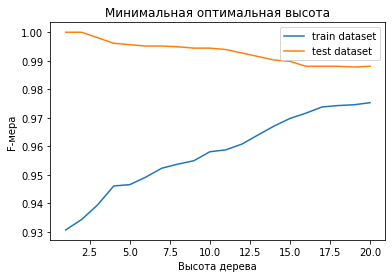

In [5]:
draw_graphic(min_h_dataset_index, 'Минимальная оптимальная высота')

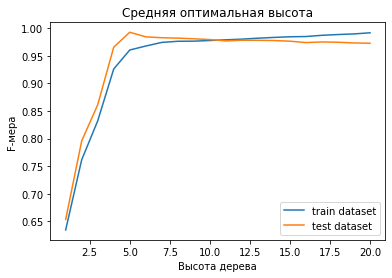

In [6]:
draw_graphic(mid_h_dataset_index, 'Средняя оптимальная высота')

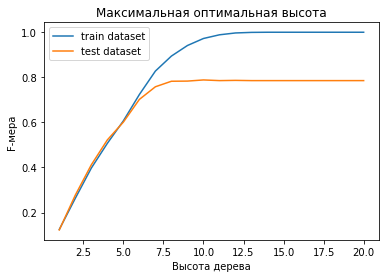

In [7]:
draw_graphic(max_h_dataset_index, 'Максимальная оптимальная высота')